## 哈佛图书馆有很多古书的影印版, 一下程序是通过定位到第一个图片的链接, 然后进行批量自动下载的.
例如: 本范例的书籍是<代微積拾級>, 咸豐已未 [1859]版本.  链接是: https://curiosity.lib.harvard.edu/chinese-rare-books/catalog/49-990081640940203941, 定位到卷1 的链接: https://iiif.lib.harvard.edu/manifests/view/drs:430970820$1i
然后在右侧下载图片的位置复制图片链接: 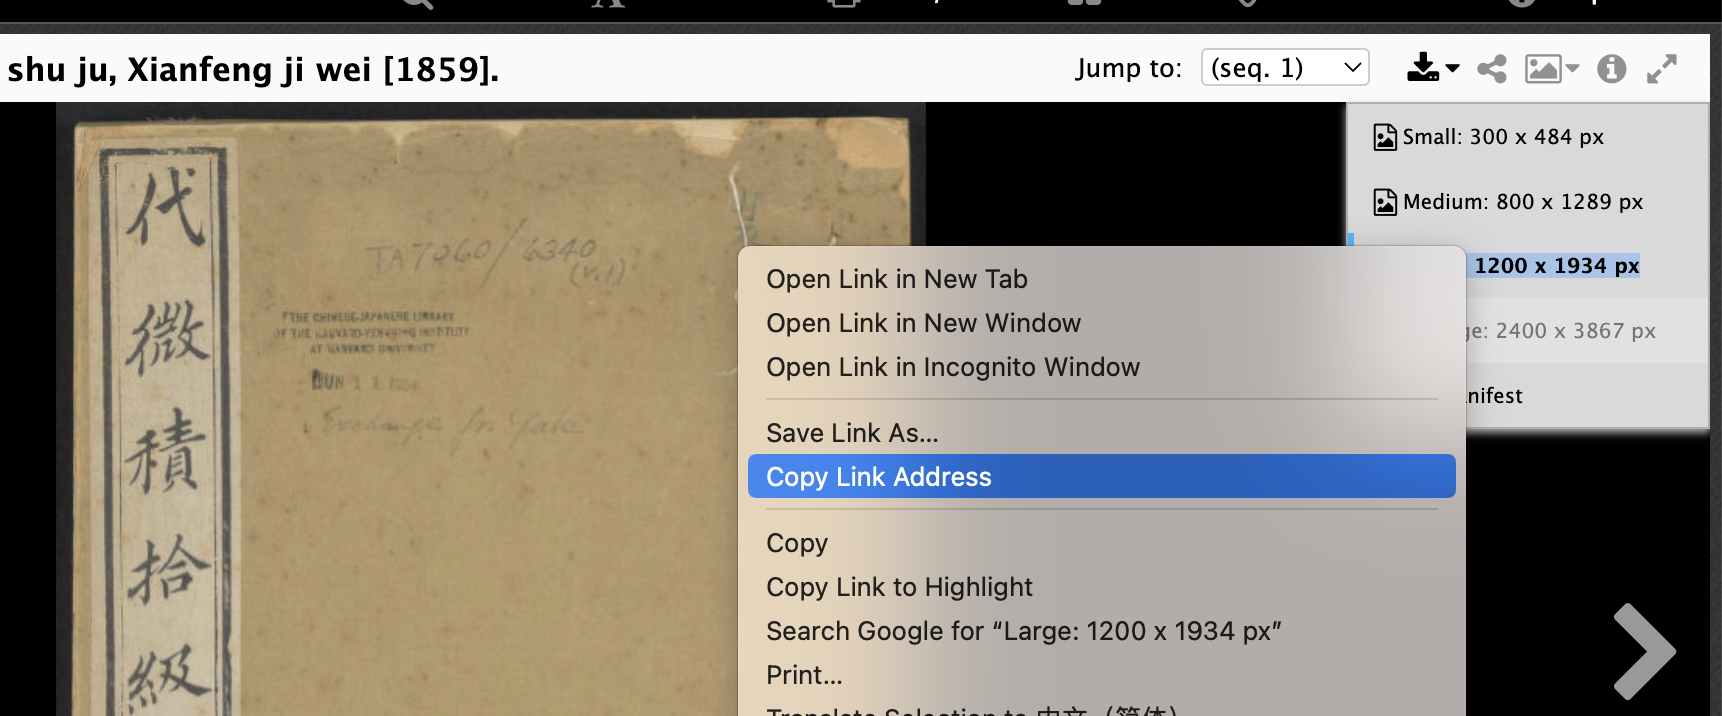,
得到图片链接: https://ids.lib.harvard.edu/ids/iiif/430970822/full/1200,/0/default.jpg?download&caption

然后替换代码中的数字部分. 查看该书有252页, 因此可以设定下载数目为252.

In [ ]:
import requests

# 定义基础URL和下载数量
base_url = "https://ids.lib.harvard.edu/ids/iiif/"
start_id = 430970822
download_count = 252

# 循环下载指定数量的图片
for i in range(download_count):
    image_id = start_id + i
    image_url = f"{base_url}{image_id}/full/1200,/0/default.jpg?download&caption"
    response = requests.get(image_url)
    
    # 检查请求是否成功
    if response.status_code == 200:
        file_name = f"{image_id}.jpg"
        with open(file_name, "wb") as file:
            file.write(response.content)
        print(f"图片 {file_name} 下载成功")
    else:
        print(f"图片 {image_id} 下载失败，状态码：{response.status_code}")

## 接下来将图片整理成一个pdf文档.

In [17]:
import os
from PIL import Image

def convert_images_to_pdf(directory, output_pdf):
    # 获取文件夹中的所有文件名
    files = os.listdir(directory)
    
    # 筛选出JPG文件，并按数字顺序排序
    jpg_files = sorted([f for f in files if f.endswith('.jpg')], key=lambda x: int(x.split('.')[0]))
    
    # 创建一个列表，存储每张图片的Image对象
    image_list = []
    
    for file in jpg_files:
        img_path = os.path.join(directory, file)
        image = Image.open(img_path)
        # 将图片转换为RGB模式
        if image.mode != 'RGB':
            image = image.convert('RGB')
        image_list.append(image)
    
    # 将第一张图片和其余的图片合并成PDF
    if image_list:
        image_list[0].save(output_pdf, save_all=True, append_images=image_list[1:])

# 示例用法
directory = '/Users/xing/Documents/Python/database/dai'
output_pdf = '/Users/xing/Documents/Python/database/dai/combined.pdf'
convert_images_to_pdf(directory, output_pdf)


### 下面的程序转换pdf, 使其适合从右到左的全屏阅读.
(第一页不变, 第二和第三交换位置, 第四和第五交换位置. 以此类推, 直到最后.)

In [18]:
import PyPDF2

def reorder_pdf_for_rtl(input_pdf, output_pdf):
    # 打开输入的PDF文件
    with open(input_pdf, 'rb') as infile:
        reader = PyPDF2.PdfReader(infile)
        num_pages = len(reader.pages)
        
        # 创建一个PDF写入器对象
        writer = PyPDF2.PdfWriter()
        
        # 添加第一页
        if num_pages > 0:
            writer.add_page(reader.pages[0])
        
        # 按照新的顺序添加页面
        for i in range(1, num_pages, 2):
            if i + 1 < num_pages:
                writer.add_page(reader.pages[i + 1])
            writer.add_page(reader.pages[i])
        
        # 写入新的PDF文件
        with open(output_pdf, 'wb') as outfile:
            writer.write(outfile)

# 示例用法

input_pdf = '/Users/xing/Documents/Python/database/book/combined.pdf'
output_pdf = '/Users/xing/Documents/Python/database/book/(从右至左全屏阅读版本).pdf'
reorder_pdf_for_rtl(input_pdf, output_pdf)
